**0. Add library**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

print("Important libraries loaded successfully")

Important libraries loaded successfully


**1. Data Exploration**

In [ ]:
data_train = pd.read_csv("https://raw.githubusercontent.com/ltdaovn/dataset/master/NLP%20with%20Disaster%20Tweets/Disaster_Tweets_train.csv")
print("Data shape = ",data_train.shape)
data_train.head()

Data shape =  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# #Read another file
# from google.colab import drive
# drive.mount ('/content/drive/')
# %cd /content/drive/MyDrive/KKDL/Do_an

# data_train = pd.read_csv("cleaned_file4.csv")
# print("Data shape = ",data_train.shape)
# data_train.head()

MessageError: Error: credential propagation was unsuccessful

**2. Data Preprocessing**

2.1 Missing Data

In [ ]:
#get total count of data including missing data
total = data_train.isnull().sum().sort_values(ascending=False)

#get percent of missing data relevant to all data
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(data_train.shape[1])

,Total,Percent
location,2533,0.332720
keyword,61,0.008013
id,0,0.000000
text,0,0.000000
target,0,0.000000


2.2 How to Handle Missing Data ?

In [ ]:
data_train = data_train.drop(['location','keyword'], axis=1)
print("location and keyword columns droped successfully")

location and keyword columns droped successfully


In [ ]:
data_train = data_train.drop('id', axis=1)
print("id column droped successfully")

id column droped successfully


In [ ]:
data_train.columns

Index(['text', 'target'], dtype='object')

**3. Basic NLP Techniques**

In [ ]:
data_train["text"].head(10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

3.1 Remove unwanted words

3.2 Transform words to lowercase

3.3 Remove stopwords

3.4 Stemming words

In [ ]:
nltk.download('stopwords')
corpus  = []
pstem = PorterStemmer()
for i in range(data_train['text'].shape[0]):
    #Remove unwanted words
    tweet = re.sub("[^a-zA-Z]", ' ', data_train['text'][i])
    #Transform words to lowercase
    tweet = tweet.lower()
    tweet = tweet.split()
    #Remove stopwords then Stemming it
    tweet = [pstem.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    #Append cleaned tweet to corpus
    corpus.append(tweet)

print("Corpus created successfully")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Corpus created successfully


In [ ]:
print(pd.DataFrame(corpus)[0].head(10))

0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
5    rockyfir updat california hwi close direct due...
6    flood disast heavi rain caus flash flood stree...
7                               top hill see fire wood
8               emerg evacu happen build across street
9                             afraid tornado come area
Name: 0, dtype: object


In [ ]:
rawTexData = data_train["text"].head(10)
cleanTexData = pd.DataFrame(corpus, columns=['text after cleaning']).head(10)

frames = [rawTexData, cleanTexData]
result = pd.concat(frames, axis=1, sort=False)
result

,text,text after cleaning
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquak may allah forgiv us
1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo rubi alaska smoke wildfir pour ...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfir updat california hwi close direct due...
6,#flood #disaster Heavy rain causes flash flood...,flood disast heavi rain caus flash flood stree...
7,I'm on top of the hill and I can see a fire in...,top hill see fire wood
8,There's an emergency evacuation happening now ...,emerg evacu happen build across street
9,I'm afraid that the tornado is coming to our a...,afraid tornado come area


In [ ]:
#Create our dictionary
uniqueWordFrequents = {}
for tweet in corpus:
    for word in tweet.split():
        if(word in uniqueWordFrequents.keys()):
            uniqueWordFrequents[word] += 1
        else:
            uniqueWordFrequents[word] = 1

#Convert dictionary to dataFrame
uniqueWordFrequents = pd.DataFrame.from_dict(uniqueWordFrequents,orient='index',columns=['Word Frequent'])
uniqueWordFrequents.sort_values(by=['Word Frequent'], inplace=True, ascending=False)
uniqueWordFrequents.head(10)

,Word Frequent
co,4746
http,4721
like,411
fire,363
amp,344
get,311
bomb,239
new,228
via,220
u,216


In [ ]:
uniqueWordFrequents['Word Frequent'].unique()

array([4746, 4721,  411,  363,  344,  311,  239,  228,  220,  216,  213,
        210,  209,  201,  183,  181,  180,  178,  175,  169,  166,  164,
        162,  156,  155,  153,  151,  145,  144,  143,  137,  133,  132,
        131,  130,  129,  128,  125,  124,  123,  122,  121,  120,  119,
        118,  117,  116,  114,  111,  110,  109,  108,  106,  105,  104,
        103,  102,  101,  100,   99,   98,   97,   96,   95,   94,   93,
         91,   90,   89,   88,   87,   86,   84,   83,   82,   79,   78,
         77,   76,   75,   74,   73,   72,   71,   70,   69,   68,   67,
         66,   65,   64,   63,   62,   61,   60,   59,   58,   57,   56,
         55,   54,   53,   52,   51,   50,   49,   48,   47,   46,   45,
         44,   43,   42,   41,   40,   39,   38,   37,   36,   35,   34,
         33,   32,   31,   30,   29,   28,   27,   26,   25,   24,   23,
         22,   21,   20,   19,   18,   17,   16,   15,   14,   13,   12,
         11,   10,    9,    8,    7,    6,    5,   

In [ ]:
uniqueWordFrequents = uniqueWordFrequents[uniqueWordFrequents['Word Frequent'] >= 20]
print(uniqueWordFrequents.shape)
uniqueWordFrequents

(787, 1)


,Word Frequent
co,4746
http,4721
like,411
fire,363
amp,344
...,...
cnn,20
gem,20
captur,20
arriv,20


3.5 Create sparse matrix ( Bag of words )

In [ ]:
counVec = CountVectorizer(max_features = uniqueWordFrequents.shape[0])
bagOfWords = counVec.fit_transform(corpus).toarray()

**4. Models Bulding**

In [ ]:
X = bagOfWords
y = data_train['target']
print("X shape = ",X.shape)
print("y shape = ",y.shape)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20, random_state=55, shuffle =True)
print('data splitting successfully')

X shape =  (7613, 787)
y shape =  (7613,)
data splitting successfully


4.1 Decision Tree Model

In [ ]:
decisionTreeModel = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = None,
                                           splitter='best',
                                           random_state=55)

decisionTreeModel.fit(X_train,y_train)

print("decision Tree Classifier model run successfully")

decision Tree Classifier model run successfully


4.2 Gradient Boosting Model

In [ ]:
gradientBoostingModel = GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 100,
                                                   max_depth = 30,
                                                   random_state=55)

gradientBoostingModel.fit(X_train,y_train)

print("gradient Boosting Classifier model run successfully")

gradient Boosting Classifier model run successfully


4.3 K - Nearest Neighbors Model

In [ ]:
KNeighborsModel = KNeighborsClassifier(n_neighbors = 7,
                                       weights = 'distance',
                                      algorithm = 'brute')

KNeighborsModel.fit(X_train,y_train)

print("KNeighbors Classifier model run successfully")

KNeighbors Classifier model run successfully


4.4 Logistic Regression Model

In [ ]:
LogisticRegression = LogisticRegression(penalty='l2',
                                        solver='saga',
                                        random_state = 55)

LogisticRegression.fit(X_train,y_train)

print("LogisticRegression Classifier model run successfully")

LogisticRegression Classifier model run successfully


4.5 Stochastic Gradient Descent Model

In [ ]:
SGDClassifier = SGDClassifier(loss = 'hinge',
                              penalty = 'l1',
                              learning_rate = 'optimal',
                              random_state = 55,
                              max_iter=100)

SGDClassifier.fit(X_train,y_train)

print("SGDClassifier Classifier model run successfully")

SGDClassifier Classifier model run successfully


4.6 Support Vector Machine Model

In [ ]:
SVClassifier = SVC(kernel= 'sigmoid',
                   #degree=3,
                   #max_iter=10000,
                   C=10000,
                   gamma=0.0001,
                   #random_state = 55,
                   )

SVClassifier.fit(X_train,y_train)

print("SVClassifier model run successfully")

SVClassifier model run successfully


4.7 Bernoulli Naive Bayes Model

In [ ]:
bernoulliNBModel = BernoulliNB(alpha=0.1)
bernoulliNBModel.fit(X_train,y_train)

print("bernoulliNB model run successfully")

bernoulliNB model run successfully


4.8 Gaussian Naive Bayes Model

In [ ]:
gaussianNBModel = GaussianNB()
gaussianNBModel.fit(X_train,y_train)

print("gaussianNB model run successfully")

gaussianNB model run successfully


4.9 Multinomial Naive Bayes Model

In [ ]:
multinomialNBModel = MultinomialNB(alpha=0.1)
multinomialNBModel.fit(X_train,y_train)

print("multinomialNB model run successfully")

multinomialNB model run successfully


4.10 Voting Classifier Model

In [ ]:
modelsNames = [('LogisticRegression',LogisticRegression),
               ('SGDClassifier',SGDClassifier),
               ('SVClassifier',SVClassifier),
               ('bernoulliNBModel',bernoulliNBModel),
               ('multinomialNBModel',multinomialNBModel)]

votingClassifier = VotingClassifier(voting = 'hard',estimators= modelsNames)
votingClassifier.fit(X_train,y_train)
print("votingClassifier model run successfully")

votingClassifier model run successfully


**5. Models evaluation**

In [ ]:
#evaluation Details
models = [decisionTreeModel, gradientBoostingModel, KNeighborsModel, LogisticRegression,
          SGDClassifier, SVClassifier, bernoulliNBModel, gaussianNBModel, multinomialNBModel, votingClassifier]

for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_train, y_train))
    print(type(model).__name__,' Test Score is    : ' ,model.score(X_test, y_test))

    y_pred = model.predict(X_test)
    print(type(model).__name__,' Acc Score is      : ' ,accuracy_score(y_test, y_pred))
    print(type(model).__name__,' Prec Score is      : ' ,precision_score(y_test, y_pred, average='weighted', zero_division=1))
    print(type(model).__name__,' Rec Score is      : ' ,recall_score(y_test, y_pred, average='weighted'))
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))

    print('--------------------------------------------------------------------------')

DecisionTreeClassifier  Train Score is   :  0.9761904761904762
DecisionTreeClassifier  Test Score is    :  0.7419566644780039
DecisionTreeClassifier  Acc Score is      :  0.7419566644780039
DecisionTreeClassifier  Prec Score is      :  0.7400080036521176
DecisionTreeClassifier  Rec Score is      :  0.7419566644780039
DecisionTreeClassifier  F1 Score is      :  0.6743993371996686
--------------------------------------------------------------------------
GradientBoostingClassifier  Train Score is   :  0.8605911330049261
GradientBoostingClassifier  Test Score is    :  0.7550886408404465
GradientBoostingClassifier  Acc Score is      :  0.7550886408404465
GradientBoostingClassifier  Prec Score is      :  0.765177691110897
GradientBoostingClassifier  Rec Score is      :  0.7550886408404465
GradientBoostingClassifier  F1 Score is      :  0.6396135265700483
--------------------------------------------------------------------------
KNeighborsClassifier  Train Score is   :  0.9761904761904762
KN

**6. SAVE MODEL (Note the saved path)**

Here I choose to save "**SVClassifier**"

In [37]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
cd /drive/MyDrive/KKDL/Do_an/Clear+Model+Deploy

/drive/MyDrive/KKDL/Do_an/Clear+Model+Deploy


In [ ]:
import pickle

#Save the model using Pickle
with open('/drive/MyDrive/KKDL/Do_an/Clear+Model+Deploy/disaster_tweet_classifier.sav', 'wb') as file:
    pickle.dump(SVClassifier, file)
#Save the model using Pickle
with open('/drive/MyDrive/KKDL/Do_an/Clear+Model+Deploy/disaster_tweet_vectorizer.sav', 'wb') as file:
    pickle.dump(counVec, file)

In [ ]:
# import joblib

# #Save the model using Pickle
# with open('/drive/MyDrive/KKDL/Do_an/Test/model_decisionTreeModel2.pkl', 'wb') as file:
#     joblib.dump(decisionTreeModel, file)

**7. DEPLOY TO ANVIL**

7.1 Tạo Giao diện Anvil

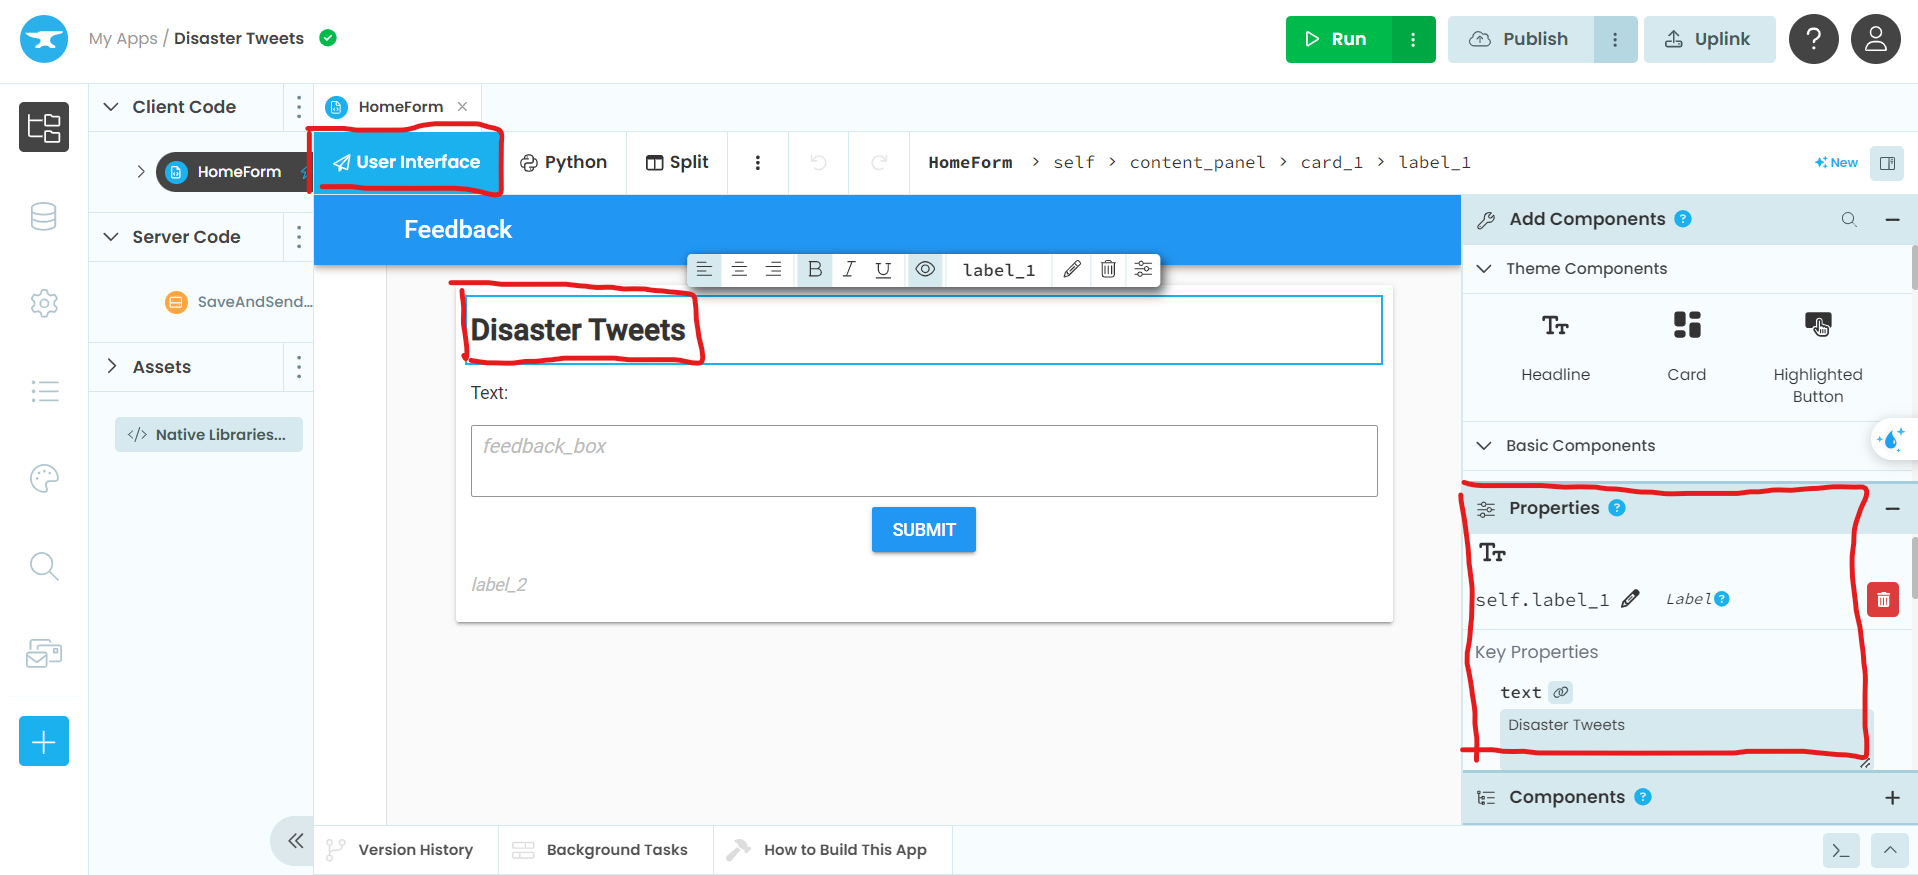

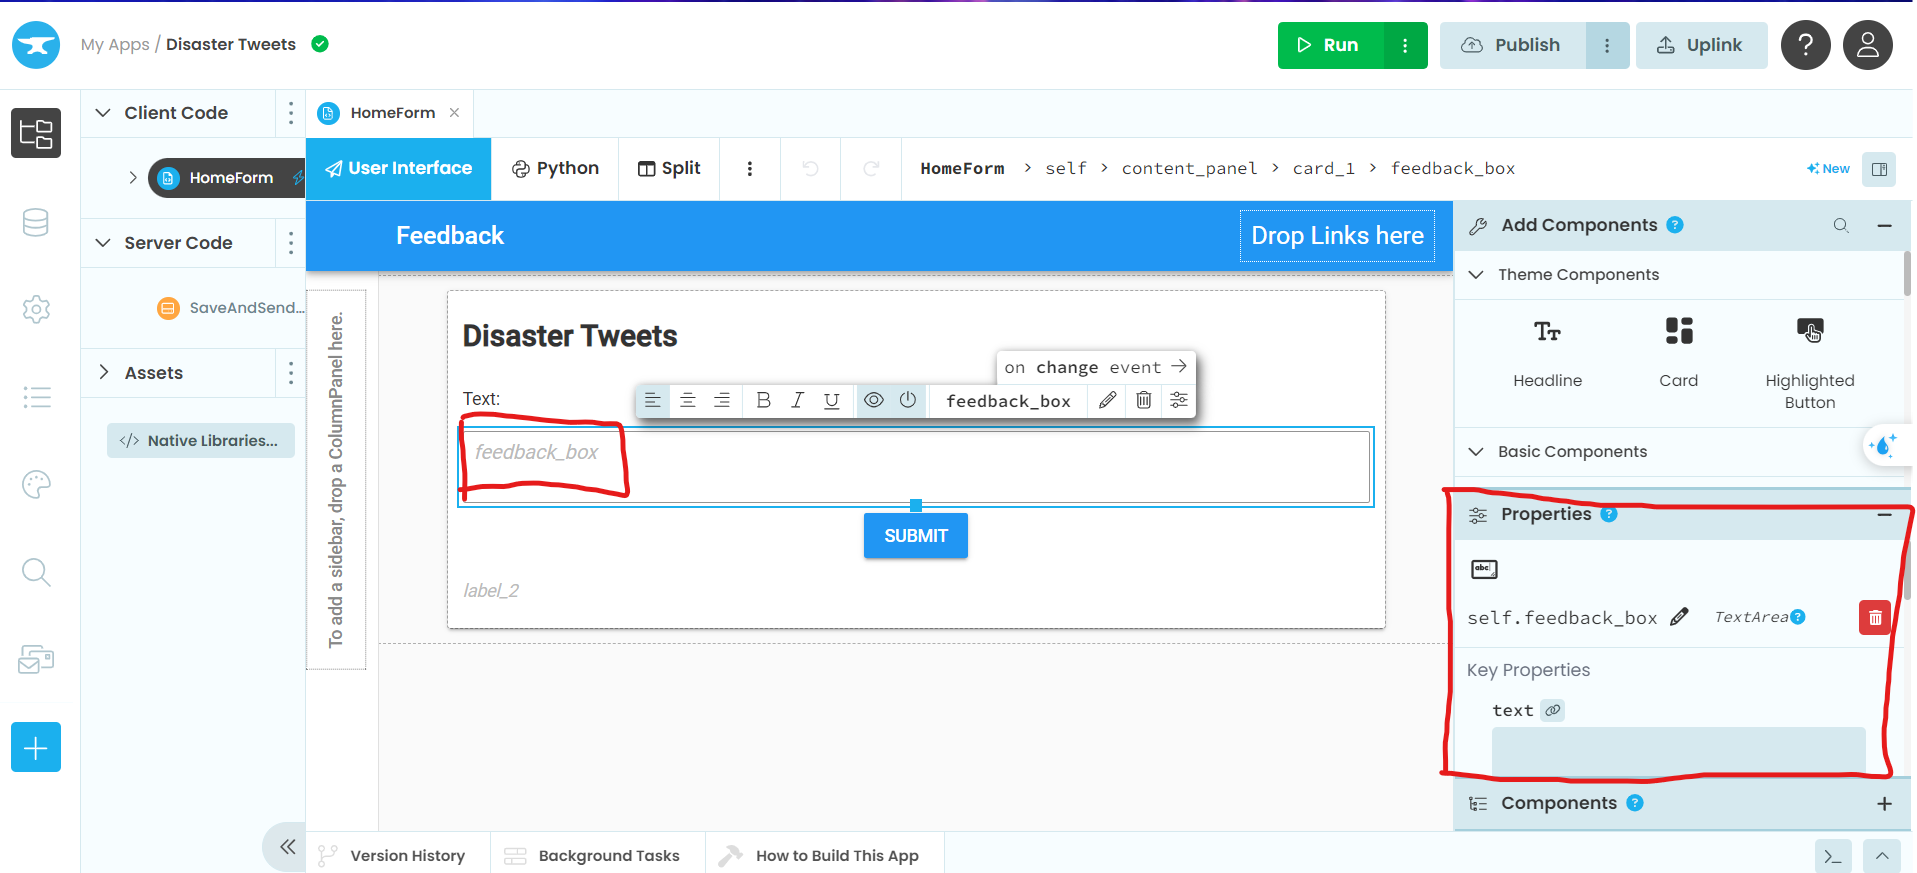

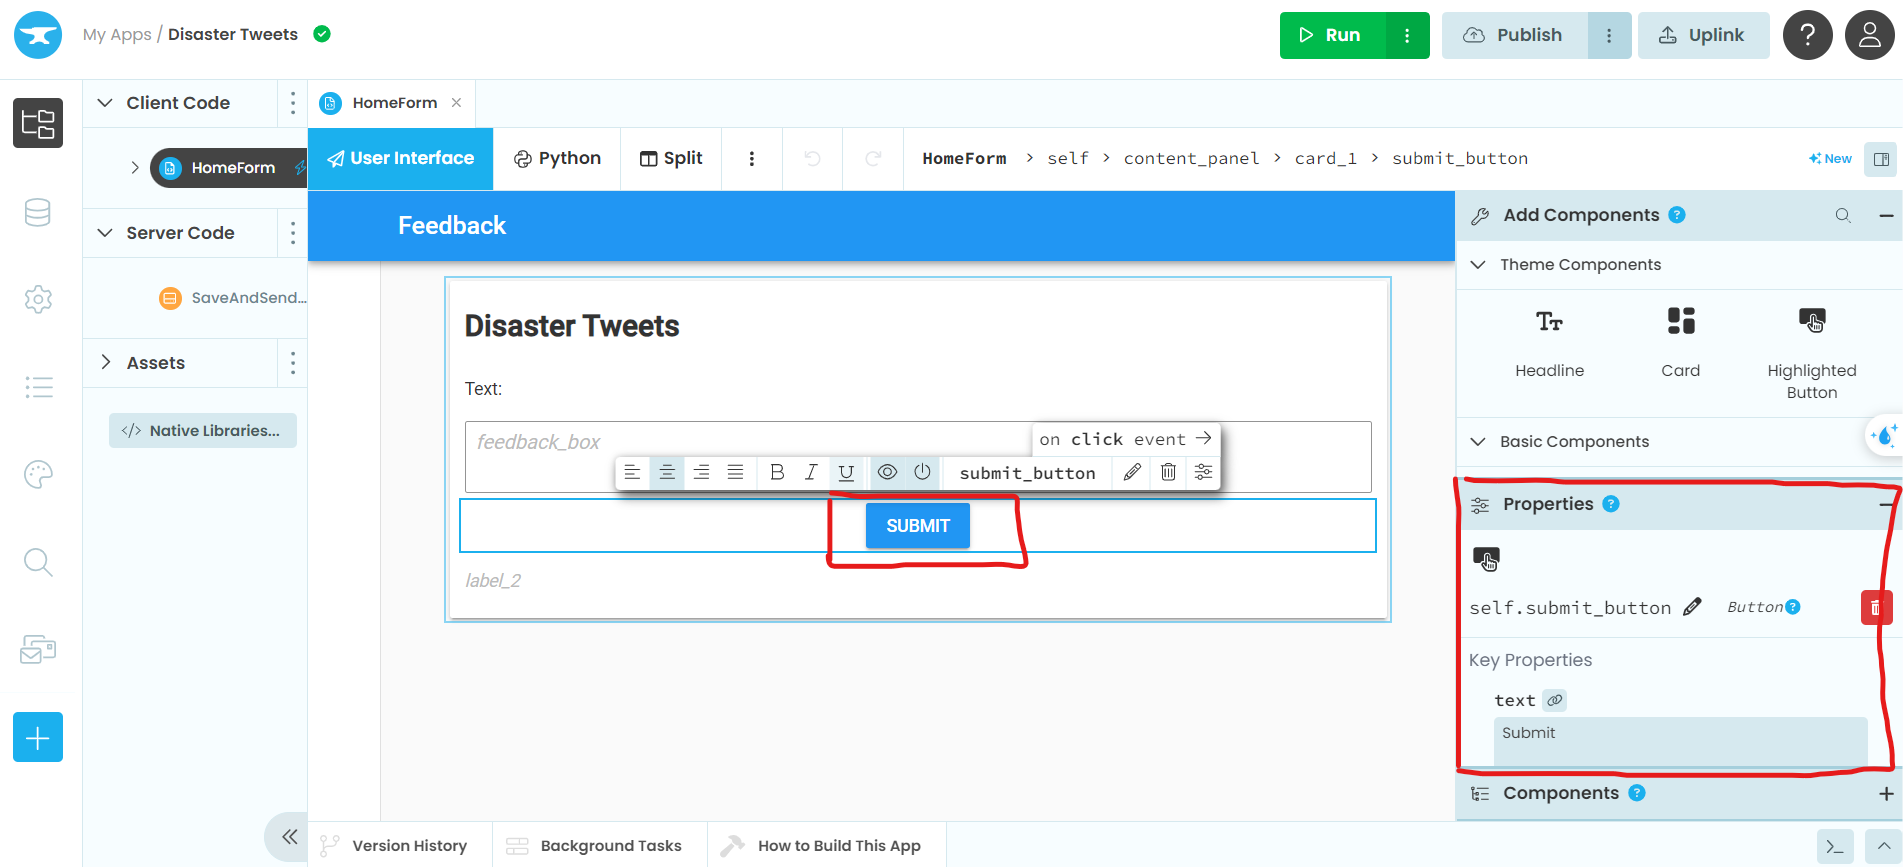

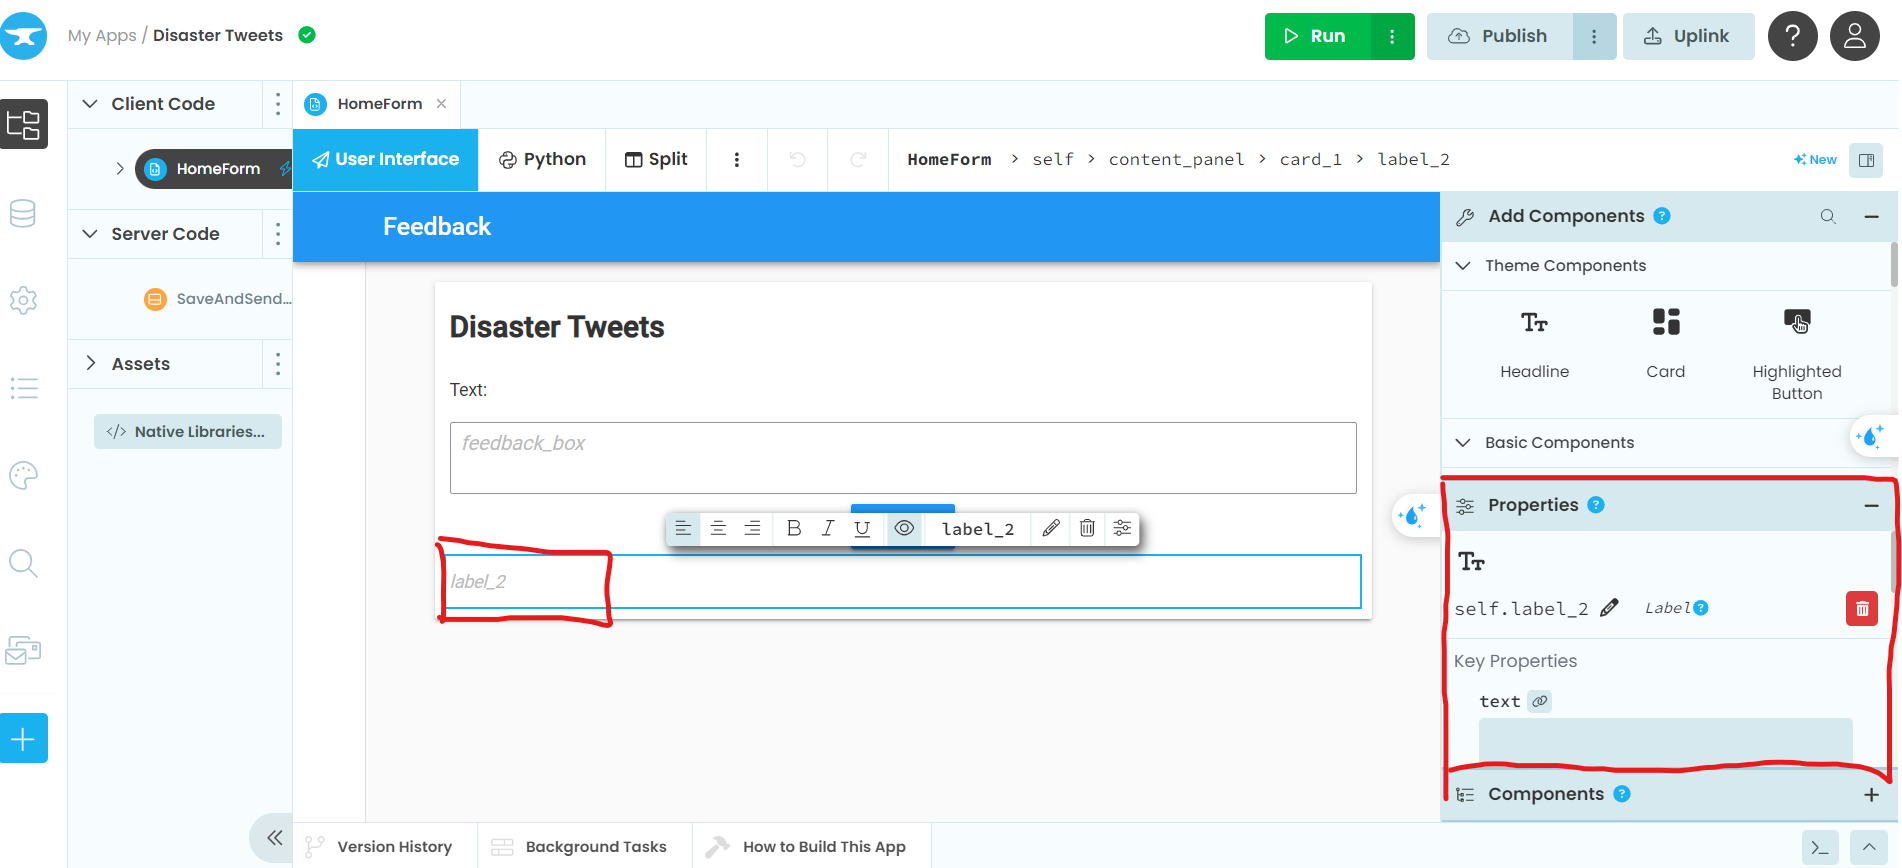

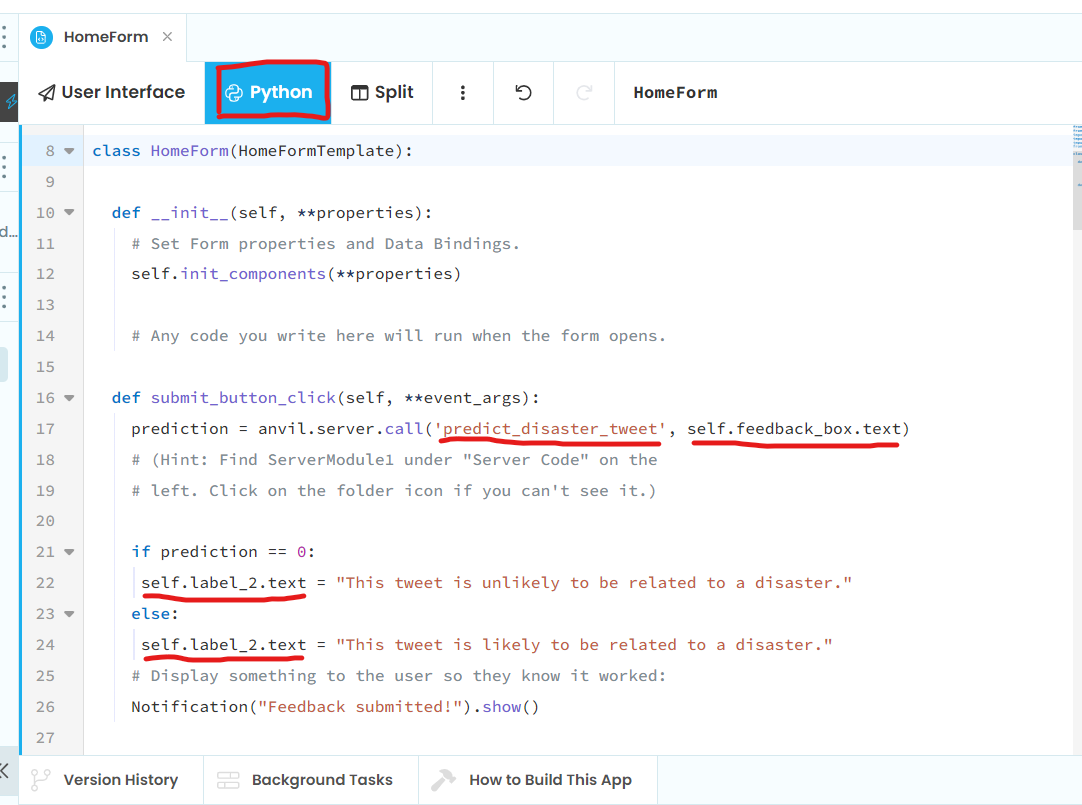

Notice "**predict_disaster_tweet**" is the name of the function **in the next step**
###########################################

"**self.feedback_box**" is the name of the created box


"**self.label_2**" is the name of the created label

In [ ]:
# from ._anvil_designer import HomeFormTemplate
# from anvil import *
# import anvil.server
# import anvil.tables as tables
# import anvil.tables.query as q
# from anvil.tables import app_tables

# class HomeForm(HomeFormTemplate):

#   def __init__(self, **properties):
#     # Set Form properties and Data Bindings.
#     self.init_components(**properties)

#     # Any code you write here will run when the form opens.

#   def submit_button_click(self, **event_args):
#     prediction = anvil.server.call('predict_disaster_tweet', self.feedback_box.text)
#     # (Hint: Find ServerModule1 under "Server Code" on the
#     # left. Click on the folder icon if you can't see it.)

#     if prediction == 0:
#      self.label_2.text = "This tweet is unlikely to be related to a disaster."
#     else:
#      self.label_2.text = "This tweet is likely to be related to a disaster."
#     # Display something to the user so they know it worked:
#     Notification("Feedback submitted!").show()

**Note that you need to complete the code on Anvil before running next step**

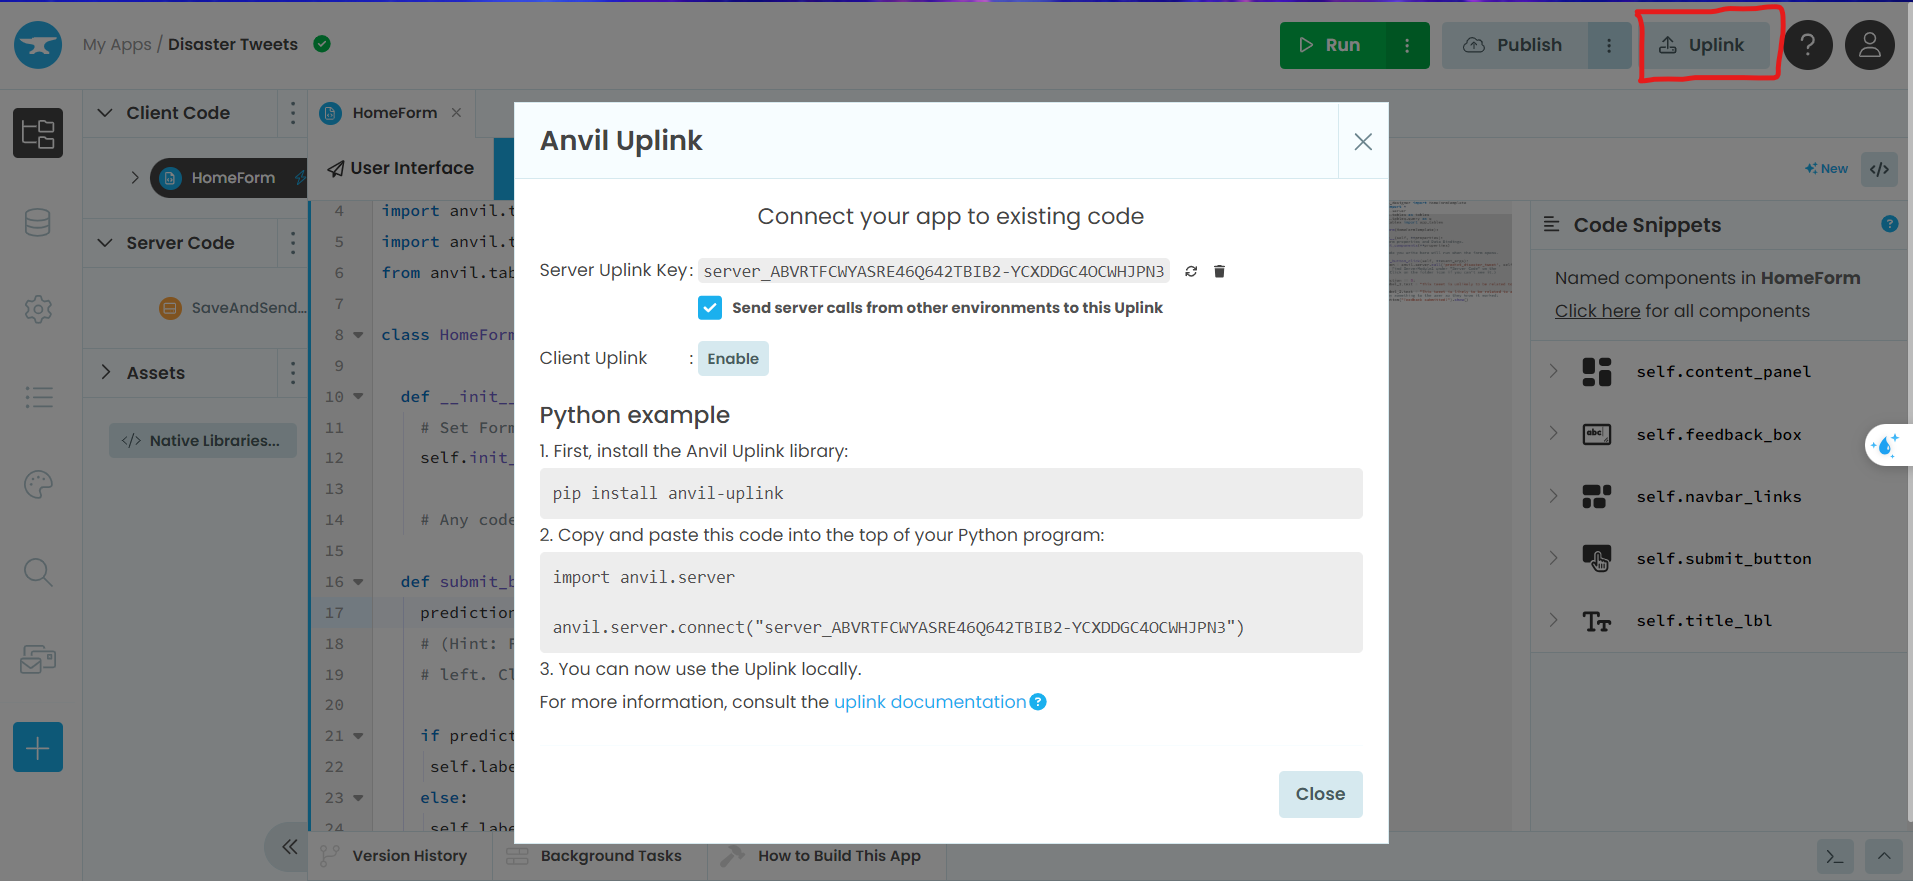

In [34]:
pip install anvil-uplink


  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [35]:
import anvil.server

anvil.server.connect("server_ABVRTFCWYASRE46Q642TBIB2-YCXDDGC4OCWHJPN3")

In [38]:
import numpy as np
import pandas as pd
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
def preprocess_text(text):
    """
    Preprocesses text data for classification.

    Args:
        text (str): The text to preprocess.

    Returns:
        str: The preprocessed text.
    """

    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)  # Remove non-alphanumeric characters
    nltk.download('stopwords')  # Download stopwords if not already downloaded
    stop_words = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    ps = PorterStemmer()  # Create a PorterStemmer object
    text = ' '.join([ps.stem(word) for word in text.split()])  # Apply stemming
    return text
@anvil.server.callable
def predict_disaster_tweet(text):###############################################
    """
    Predicts whether a text represents a disaster tweet (target 1) or not (target 0).

    Args:
        text (str): The text to predict.

    Returns:
        int: Predicted target value (0 or 1).
    """

    # Load pre-trained model (assuming it's saved as 'disaster_tweet_classifier.sav')
    model = SVC(kernel='rbf', C=100000, gamma=0.0001)
    # model.load('/drive/MyDrive/KKDL/Do_an/Test/model_decisionTreeModel2.pkl')

    with open('/drive/MyDrive/KKDL/Do_an/Clear+Model+Deploy/disaster_tweet_classifier.sav', 'rb') as f:
     model = pickle.load(f)
    # Preprocess the text
    preprocessed_text = preprocess_text(text)

    # Convert the text to a feature vector using the pre-trained count vectorizer
    # (assuming it's saved as 'disaster_tweet_vectorizer.sav')
    vectorizer = CountVectorizer()

    with open('/drive/MyDrive/KKDL/Do_an/Clear+Model+Deploy/disaster_tweet_vectorizer.sav', 'rb') as fz:
     vectorizer = pickle.load(fz)
    text_features = vectorizer.transform([preprocessed_text]).toarray()

    # Make prediction
    prediction = model.predict(text_features)[0]
    return prediction

# Example usage (assuming pre-trained model and vectorizer are loaded)
text = "ablaze fire"
prediction = predict_disaster_tweet(text)

if prediction == 0:
    print("This tweet is unlikely to be related to a disaster.")
else:
    print("This tweet is likely to be related to a disaster.")

This tweet is likely to be related to a disaster.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**8. TO ANVIL**

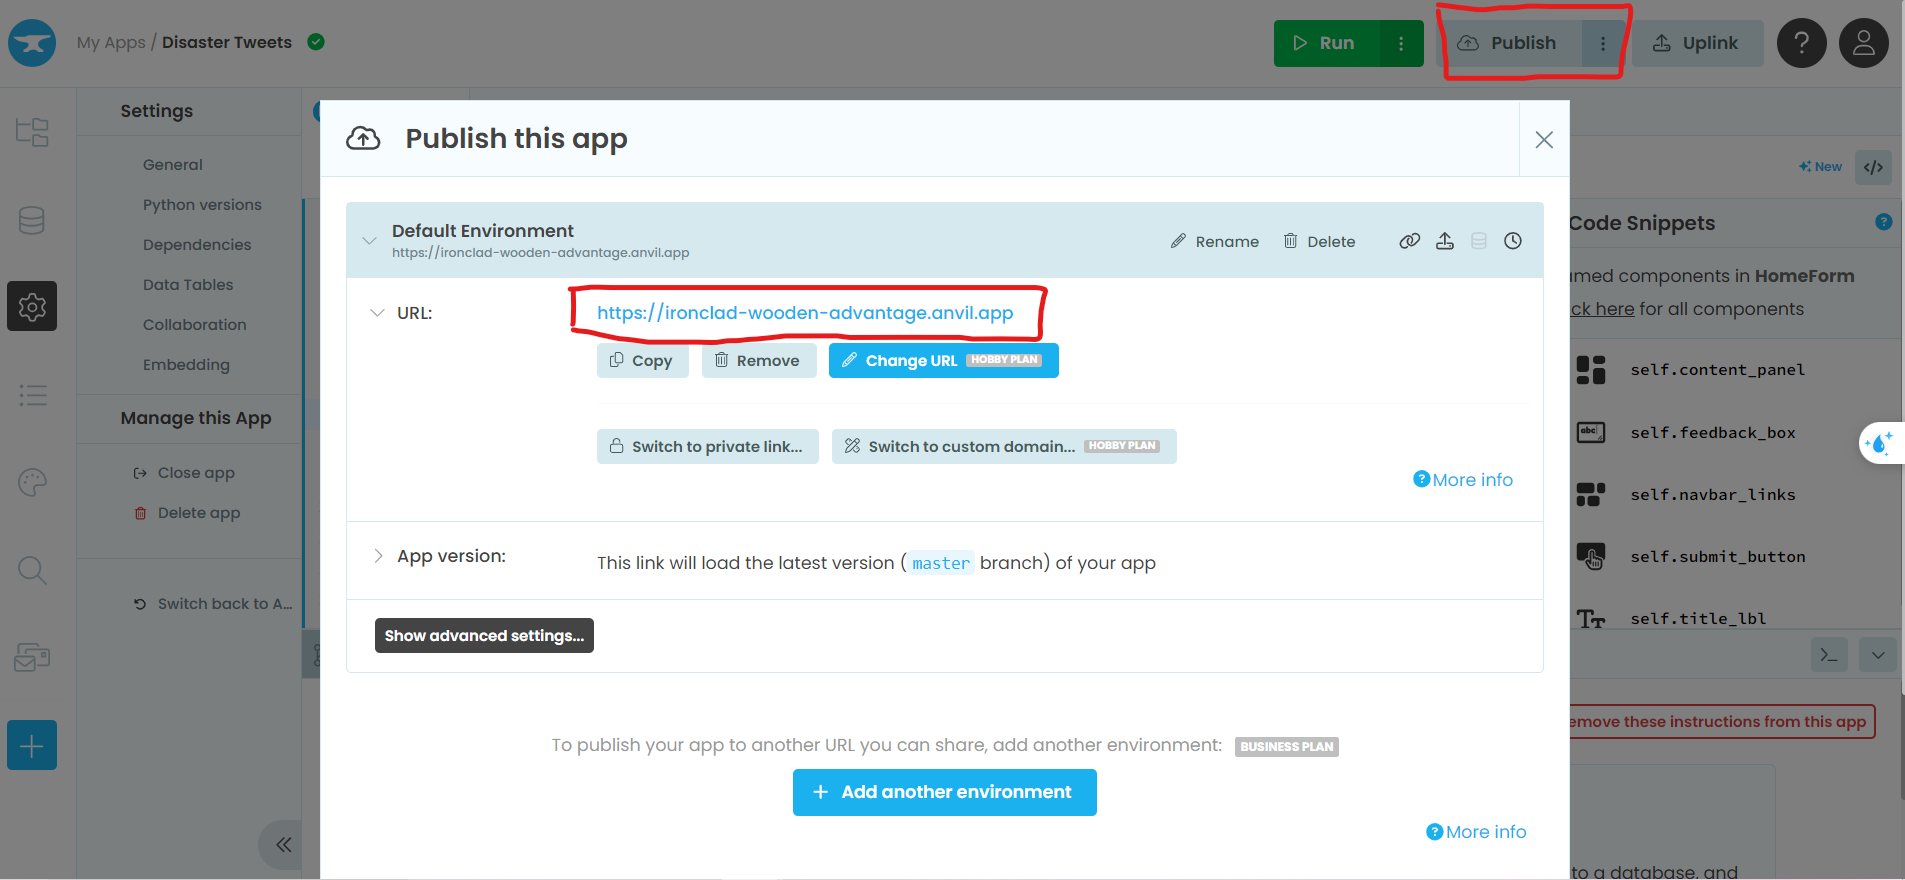

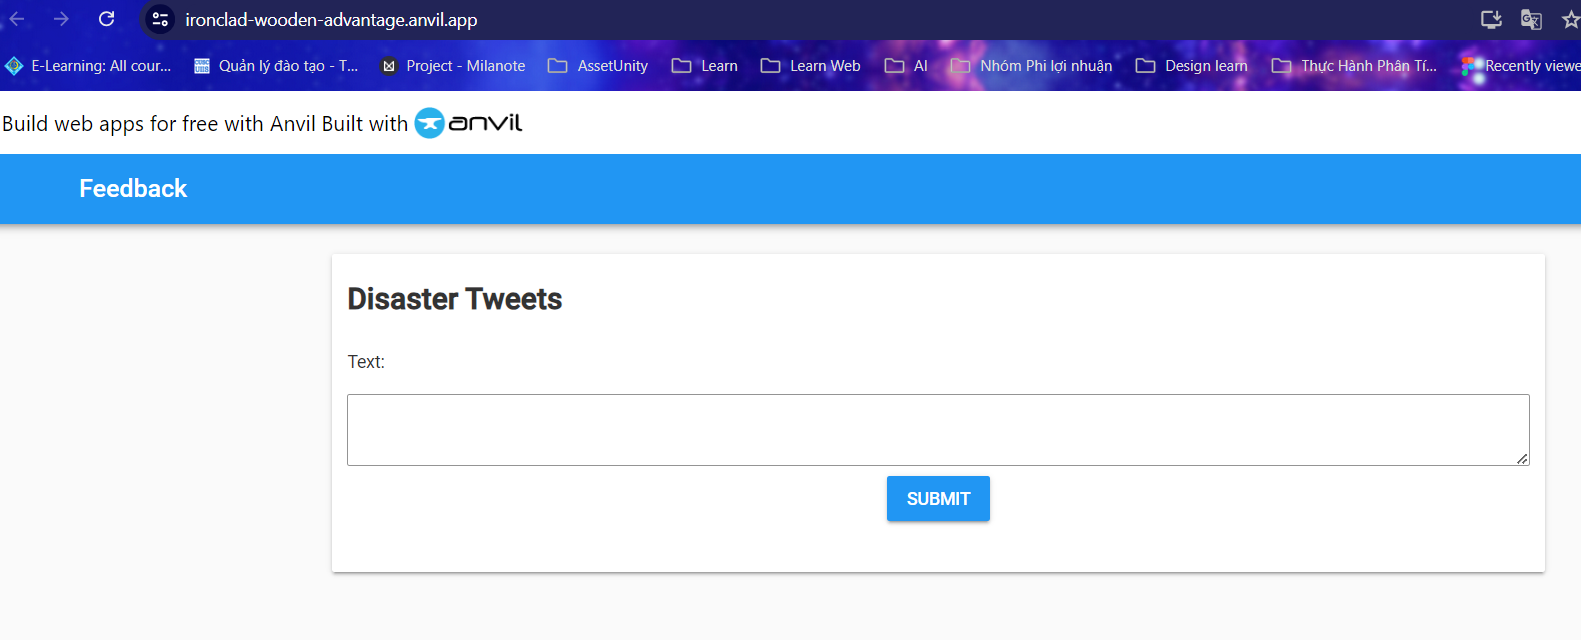

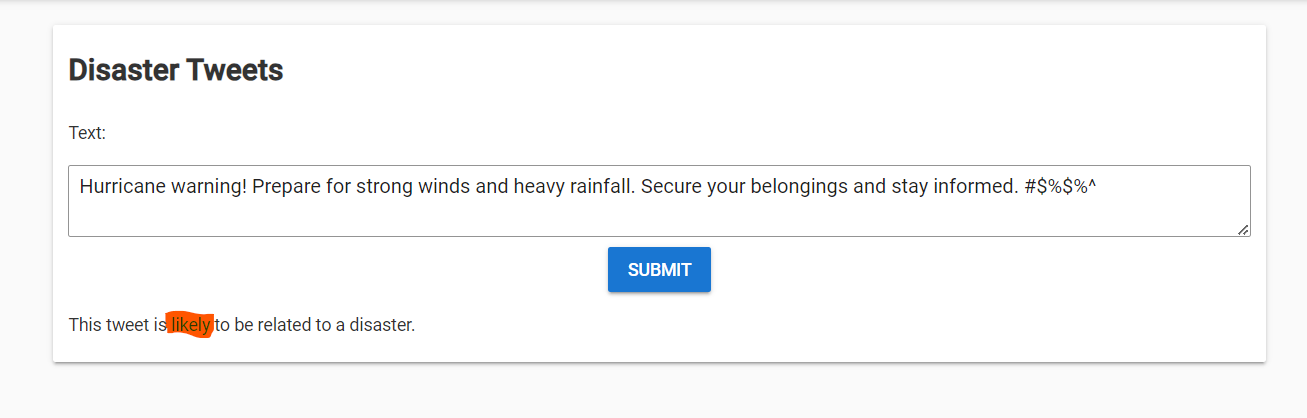

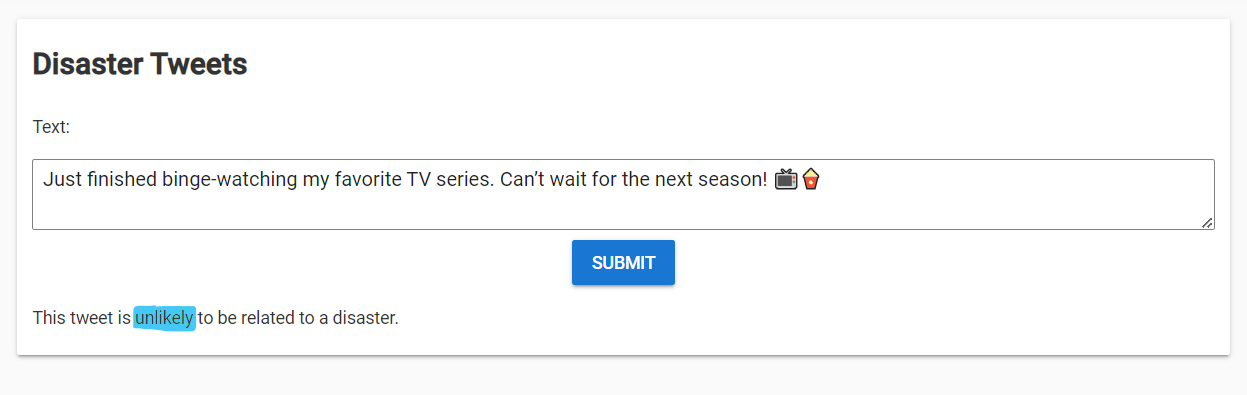

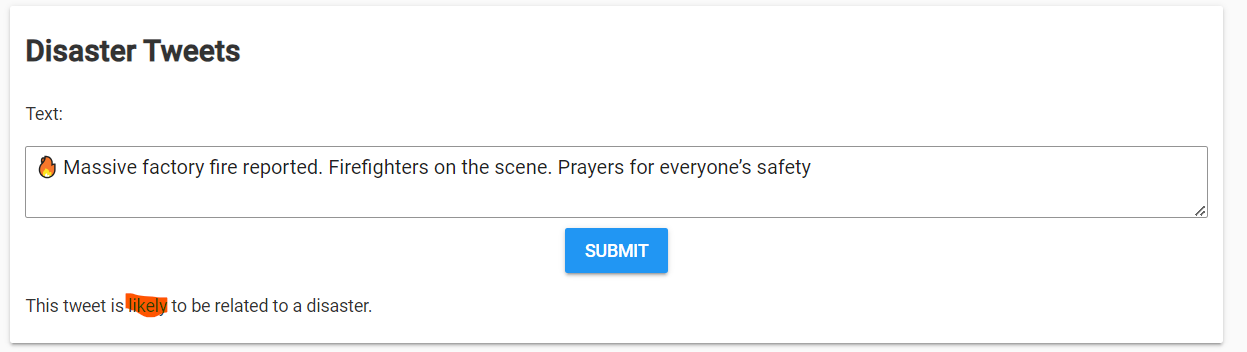

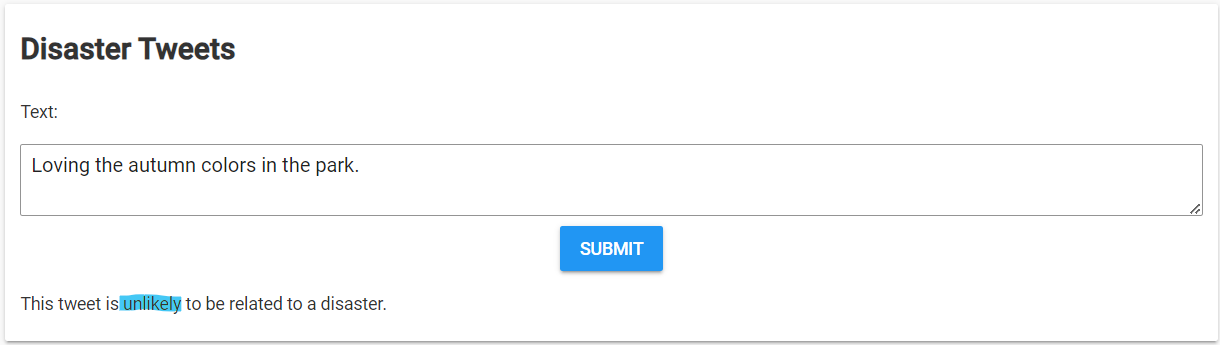

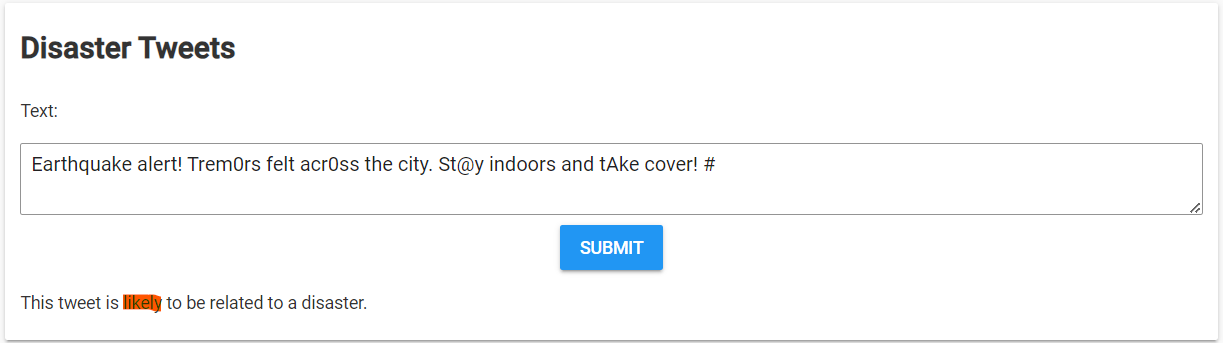